In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn as sk

%matplotlib inline

# CountVectorizer

...compte le nombre d'instances de mots.  La représentation dense nous montre le vecteur de critères correspondant à chaque phrase dans `corpus`.  Sinon, la représentation est creuse.

Essaiez avec le corpus entier pour voir ce que donne un document plus important.

À essayer et expliquer :
* `corpus_encoded.shape`
* `corpus_encoded[0].todense()`
* `corpus_encoded[0].data` et `print(corpus_encoded[0])`.
* `corpus_encoded.todense()[0]`
* `vectorizer.inverse_transform(corpus_encoded.todense()[0])`
* `vectorizer.transform('The dog runs quickly towards the cat.')`
* `vectorizer.transform(['The dog runs quickly towards the cat.'])`
* `vectorizer2 = CountVectorizer(binary=True)`

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "Il est nuit. La cabane est pauvre, mais bien close.",
    "Le logis est plein d'ombre et l'on sent quelque chose",
    "Qui rayonne à travers ce crépuscule obscur.",
    "Des filets de pêcheur sont accrochés au mur.",
    "Au fond, dans l'encoignure où quelque humble vaisselle",
    "Aux planches d'un bahut vaguement étincelle,",
    "On distingue un grand lit aux longs rideaux tombants.",
    "Tout près, un matelas s'étend sur de vieux bancs,",
    "Et cinq petits enfants, nid d'âmes, y sommeillent",
    "La haute cheminée où quelques flammes veillent",
    "Rougit le plafond sombre, et, le front sur le lit,",
    "Une femme à genoux prie, et songe, et pâlit.",
    "C'est la mère. Elle est seule. Et dehors, blanc d'écume,",
    "Au ciel, aux vents, aux rocs, à la nuit, à la brume,",
    "Le sinistre océan jette son noir sanglot.",
]
corpus2 = corpus[0:2]
vectorizer = CountVectorizer()
corpus_encoded = vectorizer.fit_transform(corpus2)
print(corpus_encoded.todense())
print('----------------------------------------------------------------')
print(vectorizer.vocabulary_)

[[1 1 0 1 2 0 1 1 0 0 1 1 0 0 1 0 0 0]
 [0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1]]
----------------------------------------------------------------
{'close': 3, 'sent': 17, 'nuit': 11, 'bien': 0, 'ombre': 12, 'la': 7, 'cabane': 1, 'est': 4, 'logis': 9, 'chose': 2, 'et': 5, 'plein': 15, 'on': 13, 'le': 8, 'pauvre': 14, 'quelque': 16, 'mais': 10, 'il': 6}


# Mots vides

Ceci ne marche pas :

    vectorizer2 = CountVectorizer(stop_words='francais')

Découvrez un peu plus.  (Astuce : qu'est-ce qui est l'erreur si vous appelez `fit_transform()`?)

# Distance

* Les vecteurs et matrices sont creuse.  Pourquoi?
* Quel problème aurons-nous avec la distance euclidienne?

In [11]:
from sklearn.metrics.pairwise import euclidean_distances

print(euclidean_distances(corpus_encoded[0], corpus_encoded[1]))
print(euclidean_distances(corpus_encoded[0], corpus_encoded[0]))
jour = vectorizer.transform(['Il est jour. La cabane est pauvre, mais bien close.'])
print(euclidean_distances(corpus_encoded[0], jour))

[[ 4.24264069]]
[[ 0.]]
[[ 1.]]


# TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
print(corpus2[0])
print(corpus2[1])
print(tfidf_vectorizer.fit_transform(corpus2).todense())
print('--------------------------------------------------------------')
print(vectorizer.fit_transform(corpus2).todense())

Il est nuit. La cabane est pauvre, mais bien close.
Le logis est plein d'ombre et l'on sent quelque chose
[[ 0.3158336   0.3158336   0.          0.3158336   0.44943642  0.
   0.3158336   0.3158336   0.          0.          0.3158336   0.3158336
   0.          0.          0.3158336   0.          0.          0.        ]
 [ 0.          0.          0.32433627  0.          0.23076793  0.32433627
   0.          0.          0.32433627  0.32433627  0.          0.
   0.32433627  0.32433627  0.          0.32433627  0.32433627  0.32433627]]
--------------------------------------------------------------
[[1 1 0 1 2 0 1 1 0 0 1 1 0 0 1 0 0 0]
 [0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1]]


# HashingVectorizer()

* Pourquoi disons-nous `transform([corpus0])` au lieu de `transform(corpus0)`?
* Expliquez l'option `norm`
* Pourquoi `n_features=6`?  Et si on essaie `n_features=10`?  `n_features=50`?

In [13]:
from sklearn.feature_extraction.text import HashingVectorizer

hash_vectorizer = HashingVectorizer(n_features=6, norm=None)
corpus1 = corpus[:1]
print(corpus1)
print(hash_vectorizer.transform(corpus1).todense())
# Trouvons les indexes non-zéro.
scipy.sparse.find(hash_vectorizer.transform(corpus1))

['Il est nuit. La cabane est pauvre, mais bien close.']
[[ 0. -3.  2. -1.  1. -1.]]


(array([0, 0, 0, 0, 0], dtype=int32),
 array([1, 2, 3, 4, 5], dtype=int32),
 array([-3.,  2., -1.,  1., -1.]))

# Computer Vision

## ROC : reconnaissance optique de caractères

(__OCR : optical characater recognition__)

Digit: 0
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
Feature vector:
 [[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]


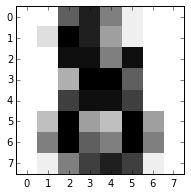

In [14]:
from sklearn import datasets

digits = datasets.load_digits()
print('Digit:', digits.target[0])
print(digits.images[0])
print('Feature vector:\n', digits.images[0].reshape(-1, 64))

plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Tout en même temps

Ici nous prenons un exemple de sklearn.  Nous chargeons toutes les images du dataset digits, nous construisons un classifieur SVM (à venir, pour l'instant, c'est juste un classifieur), et nous apprenons comment classifier les chiffres sur la première moitié des données.  Puis nous testons notre classifieur avec la deuxième moitié, où nous savons toujours le `target` (vérité, _ground truth_).

* Étudiez (et executez) l'exemple.  Comprenez tout ce que vous pouvez.  Puis nous allons le discuter ensemble.

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        87
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       898


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79 

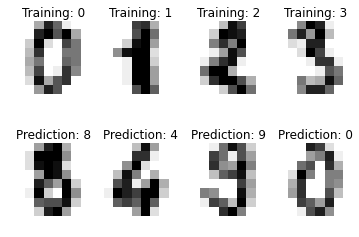

In [23]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
import math

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
num_training = math.floor(n_samples / 2)
num_test = math.ceil(n_samples / 2)
classifier.fit(data[:num_training], digits.target[:num_training])

# Now predict the value of the digit on the second half:
expected = digits.target[num_test:]
predicted = classifier.predict(data[num_test:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[num_test:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

# Feature extraction

Nous revenons aux techniques que nous comprenons.  Commençons par la détection de contours.

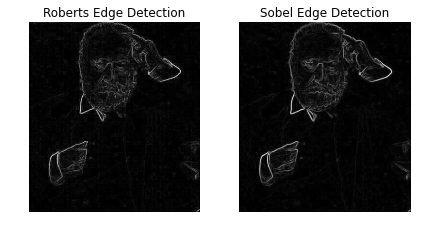

In [24]:
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.color import rgb2gray
from skimage.data import camera
import skimage.io as io

# Au choix :
#image = camera()
image = rgb2gray(io.imread('victor.jpg'))
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, (ax0, ax1) = plt.subplots(ncols=2)
ax0.imshow(edge_roberts, cmap=plt.cm.gray)
ax0.set_title('Roberts Edge Detection')
ax0.axis('off')
ax1.imshow(edge_sobel, cmap=plt.cm.gray)
ax1.set_title('Sobel Edge Detection')
ax1.axis('off')
plt.tight_layout()

Et maintenant procédons à la détection de coins (_corners_).

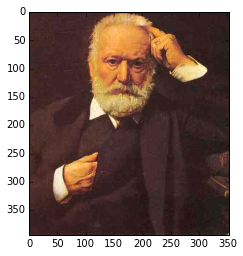

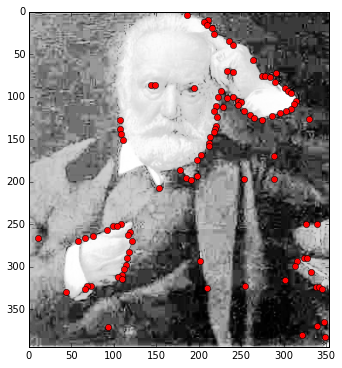

In [17]:
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
from skimage.exposure import equalize_hist

def show_corners(corners, image):
    """Show corners on image."""
    fig = plt.figure()
    plt.gray()
    plt.imshow(image)
    y_corner, x_corner = zip(*corners)
    plt.plot(x_corner, y_corner, 'or')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
    plt.show()

victor = io.imread('victor.jpg')
plt.imshow(victor)
victor = equalize_hist(rgb2gray(victor))
corners = corner_peaks(corner_harris(victor), min_distance=2)
show_corners(corners, victor)

# SURF

In [19]:
import mahotas as mh
from mahotas.features import surf
image = mh.imread('victor.jpg', as_grey=True)
print('The first SURF descriptor:\n{img}'.format(img=surf.surf(image)[0]))
print('Extracted {num} SURF descriptors'.format(num=len(surf.surf(image))))

The first SURF descriptor:
[  1.73935339e+02   1.15739993e+02   6.82376801e+00   1.33220794e+03
  -1.00000000e+00  -1.72591622e+00  -1.70541869e-03   1.60617769e-03
   2.38355301e-03   2.54046579e-03  -4.63597710e-03   5.82975542e-03
   7.14094867e-03   2.46627008e-02  -3.49762750e-02   1.16499511e-02
   3.71364348e-02   3.64397785e-02  -3.92968691e-06  -2.63693278e-04
   3.47767766e-04   4.30785317e-04  -7.16195154e-03   4.04920169e-04
   9.80949053e-03   1.41255824e-02  -8.08608562e-02  -2.22535315e-02
   9.88850657e-02   1.33295432e-01  -1.70963673e-01   2.54886321e-01
   3.29379598e-01   3.02845068e-01  -2.29519106e-03  -8.06751397e-04
   3.19303949e-03   2.64048617e-03   2.86970487e-02   7.42711480e-03
   3.33363297e-02   1.08860780e-02   3.60750255e-01  -5.18955389e-02
   3.71939948e-01   1.16847993e-01   3.54358331e-01   1.53364140e-01
   4.36690841e-01   1.97173783e-01   2.71249079e-03  -1.46300453e-03
   1.14185451e-02   6.31016919e-03   1.03713137e-04  -1.20192956e-04
   1.71

In [20]:
from sklearn import preprocessing

X = np.random.rand(4,4) * 100
print(X)
print('\n')
print(preprocessing.scale(X))

[[  2.0767189   63.46103107  38.30808265  18.78615699]
 [ 72.87899117   6.85223352  26.8588011   99.5447975 ]
 [ 58.2081801   48.62088474  46.39801168   3.75488276]
 [ 12.85563957  26.08264353  30.13694723  53.77776232]]


[[-1.15750359  1.2613196   0.38009736 -0.68301824]
 [ 1.22292789 -1.36308678 -1.12958435  1.5076167 ]
 [ 0.72968298  0.57332451  1.44682088 -1.09075213]
 [-0.79510728 -0.47155732 -0.69733389  0.26615367]]
